# Présentation et objectif du projet d'Optimisation et Apprentissage

<b><font color="#2809a6">Sophie mendes</b>
<br/>Février 2025 </font>

In [ ]:
%pip install mip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.6/462.6 kB 21.2 MB/s eta 0:00:00
  Attempting uninstall: cffi
    Found existing installation: cffi 1.17.1
    Uninstalling cffi-1.17.1:
      Successfully uninstalled cffi-1.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pygit2 1.17.0 requires cffi>=1.17.0, but you have cffi 1.15.1 which is incompatible.


In [ ]:
from mip import *

import random
import matplotlib.pyplot as plt
import numpy as np
import time

<b><font color="#2809a6">Objectif du projet </font></b> :
<br/>déterminer la droite qui maximise la distance entre elle même et le point de données le plus proche de chaque côté.

Lorsque tous les points d'une même classe ne peuvent pas être du côté du plan destiné à sa classe, il faut cependant essayer de maximiser le nombre de points qui se trouveront en effet du bon côté du plan.
Il ne faut privilégier aucune classe par rapport à l'autre.

<br/><u>Posons notre problème : </u>

<br/> Une droite ***DS*** sur un plan à 2 dimensions se définie par une équation du type :
$$w^\intercal x + b = 0$$
Avec

*   w: vecteur normal à la droite recherchée (ici c'est vecteur à 2 dimensions puisque lo'n est dans le plan)
*   b : réel égal à la distance du plan par rapport à l'origine le long du vecteur normal w .
*   x : un point sur la droite

Partons du principe que cette droite se retrouve à égale distance de 2 droites parallèles ***DPlus*** et ***DMoins***, étant l'une et l'autre le plus proche possible des points respectivement de chacune des 2 classes distribuées sur le plan.


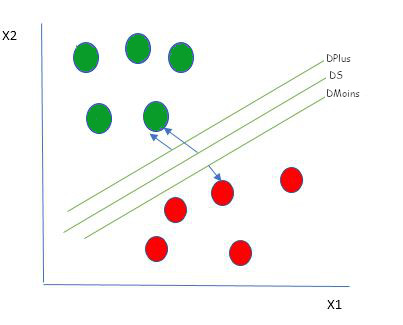

Nous cherchons donc à avoir DS telle que Dmoins et DPlus soient respectivement le plus possibles collées aux points rouges et aux points verts. Nous cherchons donc à maximiser la distance entre DS et DMoins, et par la même occasion à maximiser la distance entre DS et DPlus.

<br/> Nous pouvons donc écrire notre objectif de la manière suivante :
<br/>On veut **maximiser (Marge entre Dplus et Dmoins)**.
<br/>Soit **maximiser 2 fois la distance entre un point x de Dmoins par exemple et la droite DS**.
<br/>Soit :
$$maximiser  2 * \frac{\lvert w^\intercal x +b \rvert}{\lVert w \rVert}  $$

Or une droite du plan peut-être définie par d'inombrables équations.
<br/>En effet, pour tout k
$$\forall k \in \mathbb{R} ,  w^\intercal x + b = 0 \equiv kw^\intercal x + kb = 0$$

Donc chercher DPlus et Dmoins pour obtenir DS, revient à chercher 2 droits à la distance de 1 de DS. Nous pouvons donc poser la condition de normalisation suivante
$$\lvert w^\intercal x +b \rvert = 1  $$

Notre problème revient donc à :
$$maximiser \frac{2}{\lVert w \rVert}  $$
Ce qui est équivalent à :
$$minimiser \frac{\lVert w \rVert}{2}  $$

<br/><b>Nous venons de modéliser notre objectif à atteindre</b>.

<br/>Dans un premier temps, nous allons implémenter ce problème pour un jeu de données linéairement séparables.
<br/>Dans un deuxième temps, nous le ferons pour un jeu de données non linéairement séparables. Nous verrons alors comment trouver malgré tout une droite séparatrice non pas parfaitement des points mais au mieux en ne tenant pas compte des points abérrants, <b><font color="#2809a6"> les outliers </font></b>, dont les caractéristiques ne correspond pas à leur classe réelle.

# <b><font color="#2809a6">Fonctions globales</font></b> :

<u><font color="#2809a6">Fonction d'affichage des points et des hyperplans</font></u> :

Définissons une fonction d'affichage qui prendra en paramètres :
*   Un ensemble  de points à afficher et que l'on cherche à séparer en fonction de leur classe
*   Le vecteur de poids et le biais de l'hyperplan séparant au mieux ces points

In [ ]:
def plot_points_with_decision_boundary(Points, xlim, ylim, w=None, b=None) :
  plt.figure(figsize=(5,5))

  plt.xlim(-1, xlim)
  plt.ylim(-1, ylim)

  #Affichage des points
  colors = []
  for i in range(len(Points)) :
    if Points[i][2] == -1 :
      colors.append('red')
    else :
      colors.append('green')

  plt.scatter(Points[:,0],Points[:,1], s=10, color=colors)

  #Affichage de la droite séparatrice si ses paramètres ont été positionnés
  if w is not None and b is not None :
    if w[1] == 0 :
      w[1] = 0.001

    x_DS = np.linspace(0,200)    # generating x-points from 2 to 8
    y_DS = -(w[0] / w[1]) * x_DS - b / w[1]  # getting corresponding y-points

    plt.plot(x_DS, y_DS, c='#900C3F');

  plt.show()

<u><font color="#2809a6">Fonction d'affichage de l'équation d'un hyperplans</font></u> :

In [ ]:
#Implémantation d'une fonction permettant d'afficher l'équation de l'hyperplan trouvé
def show_hyperplane_equation(w1,w2,b):
  if w1 :
    w1 = round(w1,2)
  if w2 :
    w2 = round(w2,2)
  if b :
    b = round(b,2)
  print("L'équation de notre hyperplan séparateur est : " + "\033[1my = (" + str(w1) +"," + str(w2) + ")x + (" + str(b) + ")" + "\033[0m") ;

# <b><font color="#2809a6">Points linéairement séparables</font></b> :

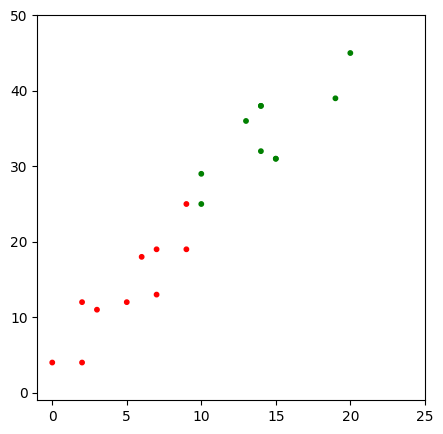

In [ ]:
######################################################################################
#   Génération d'un jeu de données de 2O points aléatoires linéairement séparables   #
######################################################################################

np.random.seed(0)

#Points = [[1,0,0] for y in range(10)]
GreenPoints = [[random.randint(10,20),0, 1 ] for x in range(10)]
RedPoints = [[random.randint(0,9),0, -1 ] for x in range(10)]


for i in range(10) :
  GreenPoints[i][1] = 1 + 2* GreenPoints[i][0] + random.randint(0,10)
  RedPoints[i][1] = -1 + 2* RedPoints[i][0] + random.randint(0,10)

G = np.array(GreenPoints)
R = np.array(RedPoints)
Points = np.concatenate((R, G))

plot_points_with_decision_boundary(Points, 25, 50)

optimum = 0.9999999999999977
L'équation de notre hyperplan séparateur est : y = (2.0,0.0)x + (-19.0)


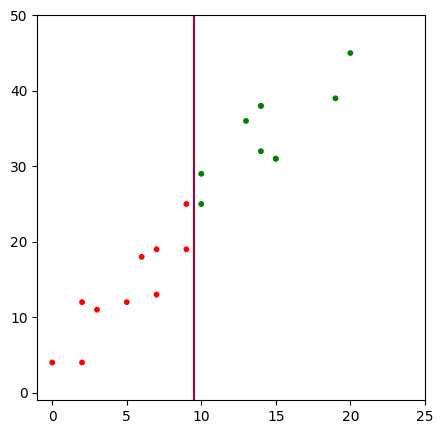

In [ ]:
n = len(Points)

#Modélisons notre problème d'optimisation
linearModel = Model()
linearModel.verbose = 0

I = set(range(2))
b = linearModel.add_var(lb = float('-inf'), var_type=CONTINUOUS)
w = [linearModel.add_var(lb = float('-inf'), var_type=CONTINUOUS) for i in I]

# Ici nous prendrons la norme 1 d'un vecteur
#Notre problème d'optimisation linéaire est donc :

linearModel.objective = minimize(1/2*(w[0] + w[1]))

for x in Points  :
  linearModel += x[2]*(w[0]*x[0] + w[1]*x[1] + b) >= 1

# Lançons notre optimisation
linearModel.optimize()
print(f"optimum = {linearModel.objective_value}")

OptimalW = [w[0].x, w[1].x ]
OptimalB = b.x

#Affichons l'équation de l'hyperplan séparateur trouvée
show_hyperplane_equation(OptimalW[0], OptimalW[1], OptimalB)

# Re dessinons nos points avec cette fois notre droite séparatrice DS :
plot_points_with_decision_boundary(Points, 25, 50, OptimalW, OptimalB)


# <b><font color="#2809a6">Points linéairement non séparables</font></b> :

Ici, en plus de maximiser la marge, nous devons également minimiser les erreurs de classification.
<br/>Ici, nous savons que nus ne pourrons pas classer les points parfaitement,certains points auront des caractéristiques qui ne seront pas en cohérence avec leur classe. Il faudra donc se contenter d'un hyperplan non pas partageant parfaitement nos points mais un hyperplan classant le maximum de points possible.




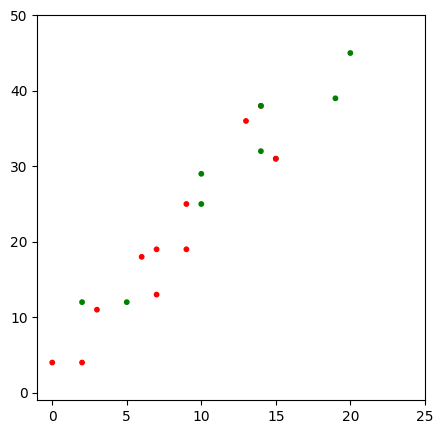

In [ ]:
######################################################################################
#   Rendons notre jeu de données linéairement NON séparables   #
######################################################################################

#Nous allons simplement mettre un point de la classe 1 dans la classe -1
Points[2][2] = 1
Points[5][2] = 1
Points[15][2] = -1
Points[11][2] = -1
Points[18][2] = -1

plot_points_with_decision_boundary(Points, 25, 50)

#Variable qui nous servira a stocker nos résultats de classement de points par type de loss
Comparation_results = []

In [ ]:
def get_loss_mean(losses) :
  sum = np.sum(losses)
  return (sum / len(losses))


In [ ]:
# Nous allons ici comparer la classe initiale d'un point avec celle qui aura été donnée par la séparation des points via l'hyperplan trouvé
def get_good_prediction_count (Points,w,b) :
  count_ok = 0

  # Nous partons du principe que les points d'abscisse les plus petits sont de classe -1
  if w[1] != 0 :
    p1 = (1, (-b-w[0])/w[1])
    p2 = (2, (-b-w[0]*2)/w[1])

  for p in Points :
    if w[1] != 0 :
      y = (-b - w[0]*p[0])/w[1]
    else :
      y = 0

    if p[2] == -1 and p[1] <= y :
      count_ok += 1
    if p[2] == 1 and p[1] >= y :
      count_ok += 1

  print(f"L'hyperplan a correctement classé {count_ok} / {len(Points)} points")
  return count_ok

Nous avons maintenant 11 points de classe -1 et 9 points de classe 1.

Pour réussir à déterminer un hyperplan séparant au mieux des points non linéairemet séparables, nous utiliserons une fonction de loss.
Les fonctions de perte permettent :

<br/>
<u><font color="#2809a6">Utilisation de la fonction Hinge loss</font></u> :

In [ ]:
def hinge_loss_optimisation(points, c) :
  hingeLossModel = Model()
  hingeLossModel.verbose = 0

  I = set(range(2))
  b = hingeLossModel.add_var(lb = float('-inf'), var_type=CONTINUOUS)
  w = [hingeLossModel.add_var(lb = float('-inf'), var_type=CONTINUOUS) for i in I]
  hingeLoss = [hingeLossModel.add_var(np.maximum(0, 1 - x[2]*(w[0]*x[0] + w[1]*x[1] + b))) for x in Points]

  hingeLossModel.objective = minimize(1/2*(w[0] + w[1]) + c * xsum(hingeLoss[i] for i in range(len(hingeLoss))))

  for i in range(len(Points)) :
    x = Points[i]
    hingeLossModel += x[2]*(w[0]*x[0] + w[1]*x[1] + b) >= 1 - hingeLoss[i]
    hingeLossModel += hingeLoss[i] >= 0

  # Lançons notre optimisation
  hingeLossModel.optimize()

  OptimalW = [w[0].x, w[1].x]
  OptimalB = b.x

  losses = []
  for i in range(len(Points)) :
    losses.append(hingeLoss[i].x)

  return hingeLossModel.objective_value, OptimalW, OptimalB, get_loss_mean(losses)

In [ ]:
# La modélisation de notre problème devient

# Define a range of values for C
# Il faudrait faire une boucle permettant de trouver quel constante C est la plus performante
C_values = [ 0.1, 1, 10, 100]
Results_by_C = []

for c in C_values :
  t = time.time()

  hingeLossResponse = hinge_loss_optimisation(Points, c)

  OptimalObjective_value = hingeLossResponse[0]
  OptimalW = hingeLossResponse[1]
  OptimalB = hingeLossResponse[2]
  lossvalue = hingeLossResponse[3]

  print(f"\n-----   HINGE LOSS, C = {c}    -----\n")
  print(f"Temps d'execution = {round(time.time() - t, 4 ) } s")

  print(f"optimum = {OptimalObjective_value}")
  print(f"valeur de la loss =  {lossvalue}")

  show_hyperplane_equation(round(OptimalW[0],3), round(OptimalW[1],3), round(OptimalB,3))

  count_ok = get_good_prediction_count(Points, OptimalW, OptimalB)
  Results_by_C.append((count_ok, c))


-----   HINGE LOSS, C = 0.1    -----

Temps d'execution = 0.0055 s
optimum = 1.4881355932203388
valeur de la loss =  0.7271186440677966
L'équation de notre hyperplan séparateur est : y = (-0.02,0.09)x + (-1.98)
L'hyperplan a correctement classé 14 / 20 points

-----   HINGE LOSS, C = 1    -----

Temps d'execution = 0.0054 s
optimum = 14.576271186440676
valeur de la loss =  0.7271186440677966
L'équation de notre hyperplan séparateur est : y = (-0.02,0.09)x + (-1.98)
L'hyperplan a correctement classé 14 / 20 points

-----   HINGE LOSS, C = 10    -----

Temps d'execution = 0.0055 s
optimum = 145.1860465116279
valeur de la loss =  0.7255813953488371
L'équation de notre hyperplan séparateur est : y = (0.12,0.02)x + (-2.12)
L'hyperplan a correctement classé 13 / 20 points

-----   HINGE LOSS, C = 100    -----

Temps d'execution = 0.0054 s
optimum = 1451.2325581395348
valeur de la loss =  0.7255813953488371
L'équation de notre hyperplan séparateur est : y = (0.12,0.02)x + (-2.12)
L'hyperplan

In [ ]:
best_results = sorted(Results_by_C, key=lambda x: x[0], reverse=True)[0]
c_with_max_count_ok = best_results[1]
count_ok = best_results[0]

print(f"\033[1m\033[32mOn constate que la plus petite moyenne des hinge est obtenue avec la constante {c_with_max_count_ok}\033[0m")

On constate que la plus petite moyenne des hinge est obtenue avec la constante 0.1


Voici nos points séparés avec la meilleure optimisation de la Hinge Loss.
L'hyperplan a correctement classé 14 / 20 points


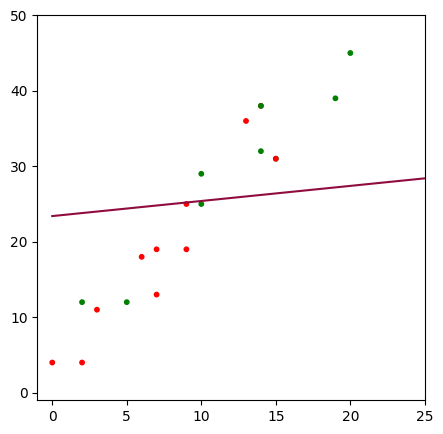

In [ ]:
hingeLossResponse = hinge_loss_optimisation(Points, c_with_max_count_ok)
OptimalW = hingeLossResponse[1]
OptimalB = hingeLossResponse[2]

print("Voici nos points séparés avec la meilleure optimisation de la Hinge Loss.")
get_good_prediction_count(Points, OptimalW, OptimalB)

plot_points_with_decision_boundary(Points, 25, 50, OptimalW, OptimalB)

In [ ]:
#Sauvegarde des résultats
Comparation_results.append(("HINGE LOSS", c_with_max_count_ok, hinge_loss_optimisation, count_ok))

<br/>
<u><font color="#2809a6">Utilisation de la fonction Ramp loss</font></u> :

In [ ]:
def ramp_loss_optimisation(Points, c):
  # La modélisation de notre problème devient
  rampLossModel = Model()
  rampLossModel.verbose = 0

  I = set(range(2))
  b = rampLossModel.add_var(lb = float('-inf'), var_type=CONTINUOUS)
  w = [rampLossModel.add_var(lb = float('-inf'), var_type=CONTINUOUS) for i in I]
  rampLoss = [rampLossModel.add_var(np.maximum(0, 1 - x[2]*(w[0]*x[0] + w[1]*x[1] + b))) for x in Points]

  z = [(1 if x[2]*(w[0]*x[0] + w[1]*x[1] + b) <= -1 else 0) for x in Points]

  rampLossModel.objective = minimize(1/2*(w[0] + w[1]) + c*(xsum(z[i] for i in range(len(rampLoss))) + 2*xsum(rampLoss[i] for i in range(len(rampLoss)))) )

  for i in range(len(Points)) :
    x = Points[i]
    rampLossModel += x[2]*(w[0]*x[0] + w[1]*x[1] + b) >= 1 - rampLoss[i]
    rampLossModel += rampLoss[i] >= 0
    rampLossModel += rampLoss[i] <= 2

  # Lançons notre optimisation
  rampLossModel.optimize()

  OptimalW = [w[0].x, w[1].x ]
  OptimalB = b.x

  losses = []
  for i in range(len(Points)) :
    losses.append(rampLoss[i].x)

  return rampLossModel.objective_value, OptimalW, OptimalB, get_loss_mean(losses)

In [ ]:
# Define a range of values for C
# Il faudrait faire une boucle permettant de trouver quel constante C est la plus performante
C_values = [0.01, 0.1, 1, 10, 100]
Results_by_C = []

for c in C_values :
  t = time.time()

  rampLossResponse = ramp_loss_optimisation(Points, c)

  OptimalObjective_value = rampLossResponse[0]
  OptimalW = rampLossResponse[1]
  OptimalB = rampLossResponse[2]
  lossvalue = rampLossResponse[3]

  print(f"\n-----   RAMP LOSS, C = {c}    -----\n")
  print(f"Temps d'execution = {round(time.time() - t, 4 ) } s")

  print(f"optimum = {OptimalObjective_value}")
  print(f"valeur de la loss =  {lossvalue}")

  show_hyperplane_equation(round(OptimalW[0],3), round(OptimalW[1],3), round(OptimalB,3))
  count_ok = get_good_prediction_count(Points, OptimalW, OptimalB)
  Results_by_C.append((count_ok, c))



-----   RAMP LOSS, C = 0.01    -----

Temps d'execution = 0.0062 s
optimum = 0.4647191011235955
valeur de la loss =  0.9146067415730338
L'équation de notre hyperplan séparateur est : y = (-0.43,0.23)x + (-1.56)
L'hyperplan a correctement classé 12 / 20 points

-----   RAMP LOSS, C = 0.1    -----

Temps d'execution = 0.0037 s
optimum = 4.948760330578512
valeur de la loss =  0.7289256198347107
L'équation de notre hyperplan séparateur est : y = (-0.02,0.08)x + (-1.91)
L'hyperplan a correctement classé 13 / 20 points

-----   RAMP LOSS, C = 1    -----

Temps d'execution = 0.0063 s
optimum = 49.1900826446281
valeur de la loss =  0.7289256198347107
L'équation de notre hyperplan séparateur est : y = (-0.02,0.08)x + (-1.91)
L'hyperplan a correctement classé 13 / 20 points

-----   RAMP LOSS, C = 10    -----

Temps d'execution = 0.0063 s
optimum = 491.603305785124
valeur de la loss =  0.7289256198347107
L'équation de notre hyperplan séparateur est : y = (-0.02,0.08)x + (-1.91)
L'hyperplan a co

In [ ]:
best_results = sorted(Results_by_C, key=lambda x: x[0], reverse=True)[0]
c_with_max_count_ok = best_results[1]
count_ok = best_results[0]

print(f"\033[1m\033[32mOn constate que la plus petite moyenne des ramp loss est obtenue avec la constante {c_with_max_count_ok}\033[0m")

On constate que la plus petite moyenne des ramp loss est obtenue avec la constante 0.1


Voici nos points séparés avec la meilleure optimisation de la Ramp Loss.
L'hyperplan a correctement classé 13 / 20 points


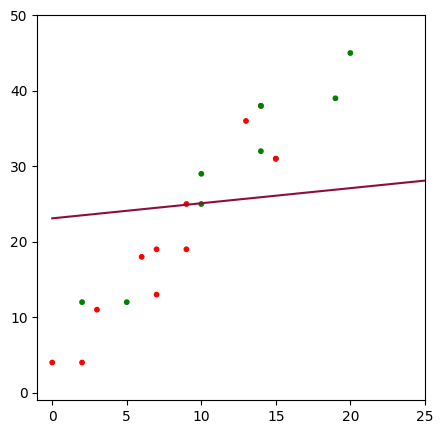

In [ ]:
rampLossResponse = ramp_loss_optimisation(Points, c_with_max_count_ok)
OptimalW = rampLossResponse[1]
OptimalB = rampLossResponse[2]

print("Voici nos points séparés avec la meilleure optimisation de la Ramp Loss.")
get_good_prediction_count(Points, OptimalW, OptimalB)

plot_points_with_decision_boundary(Points, 25, 50, OptimalW, OptimalB)

In [ ]:
#Sauvegarde des résultats
Comparation_results.append(("RAMP LOSS", c_with_max_count_ok, ramp_loss_optimisation, count_ok))

<br/>
<u><font color="#2809a6">Utilisation de la fonction Hard margin loss</font></u> :

In [ ]:
def hard_margin_loss_optimisation(points, c) :
  hardMarginLossModel = Model()
  hardMarginLossModel.verbose = 0

  I = set(range(2))
  b = hardMarginLossModel.add_var(lb = float('-inf'), var_type=CONTINUOUS)
  w = [hardMarginLossModel.add_var(lb = float('-inf'), var_type=CONTINUOUS) for i in I]

  z = [(1 if x[2]*(w[0]*x[0] + w[1]*x[1] + b) <= 1 else 0) for x in Points]

  hardMarginLossModel.objective = minimize(1/2*(w[0] + w[1]) + c*(2*xsum(z[i] for i in range(len(Points)))) )

  for i in range(len(Points)) :
    x = Points[i]
    hardMarginLossModel += x[2]*(w[0]*x[0] + w[1]*x[1] + b) >= 1 - 1000000000*z[i]

  # Lançons notre optimisation
  hardMarginLossModel.optimize()

  OptimalW = [w[0].x, w[1].x]
  OptimalB = b.x

  losses = []
  for i in range(len(z)) :
    losses.append(z[i])

  return hardMarginLossModel.objective_value, OptimalW, OptimalB, get_loss_mean(losses)

In [ ]:
# Define a range of values for C
# Il faudrait faire une boucle permettant de trouver quel constante C est la plus performante
C_values = [0.01, 0.1, 1, 10, 100]
Results_by_C = []

for c in C_values :
  t = time.time()

  hardMarginResponse = hard_margin_loss_optimisation(Points, c)

  OptimalObjective_value = hardMarginResponse[0]
  OptimalW = hardMarginResponse[1]
  OptimalB = hardMarginResponse[2]
  lossvalue = hardMarginResponse[3]

  print(f"\n-----   HARD MARGIN LOSS, C = {c}    -----\n")
  print(f"Temps d'execution = {round(time.time() - t, 4 ) } s")

  print(f"optimum = {OptimalObjective_value}")
  print(f"valeur de la loss =  {lossvalue}")

  show_hyperplane_equation(round(OptimalW[0],3), round(OptimalW[1],3), round(OptimalB,3))
  count_ok = get_good_prediction_count(Points, OptimalW, OptimalB)
  Results_by_C.append((count_ok, c))


-----   HARD MARGIN LOSS, C = 0.01    -----

Temps d'execution = 0.0035 s
optimum = -124183006.0117647
valeur de la loss =  1.0
L'équation de notre hyperplan séparateur est : y = (-418300653.18,169934640.35)x + (320261437.59)
L'hyperplan a correctement classé 8 / 20 points

-----   HARD MARGIN LOSS, C = 0.1    -----

Temps d'execution = 0.0028 s
optimum = -124183002.41176471
valeur de la loss =  1.0
L'équation de notre hyperplan séparateur est : y = (-418300653.18,169934640.35)x + (320261437.59)
L'hyperplan a correctement classé 8 / 20 points

-----   HARD MARGIN LOSS, C = 1    -----

Temps d'execution = 0.0024 s
optimum = -124182966.41176471
valeur de la loss =  1.0
L'équation de notre hyperplan séparateur est : y = (-418300653.18,169934640.35)x + (320261437.59)
L'hyperplan a correctement classé 8 / 20 points

-----   HARD MARGIN LOSS, C = 10    -----

Temps d'execution = 0.0017 s
optimum = -124182606.41176471
valeur de la loss =  1.0
L'équation de notre hyperplan séparateur est : y 

In [ ]:
best_results = sorted(Results_by_C, key=lambda x: x[0], reverse=True)[0]
c_with_max_count_ok = best_results[1]
count_ok = best_results[0]

print(f"\033[1m\033[32mOn constate que la plus petite moyenne des hard margin loss est obtenue avec la constante {c_with_max_count_ok}\033[0m")

On constate que la plus petite moyenne des hard margin loss est obtenue avec la constante 0.01


Voici nos points séparés avec la meilleure optimisation de la hard margin Loss.
L'hyperplan a correctement classé 8 / 20 points


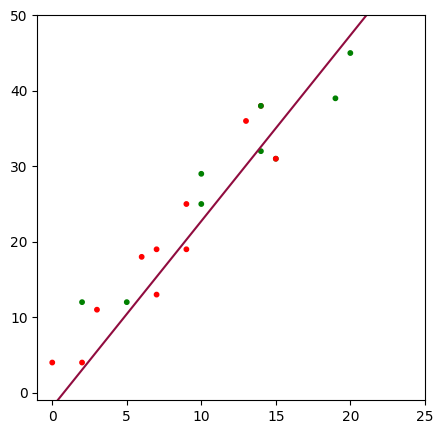

In [ ]:
hardMarginLossResponse = hard_margin_loss_optimisation(Points, c_with_max_count_ok)
OptimalW = hardMarginLossResponse[1]
OptimalB = hardMarginLossResponse[2]

print("Voici nos points séparés avec la meilleure optimisation de la hard margin Loss.")
get_good_prediction_count(Points, OptimalW, OptimalB)

plot_points_with_decision_boundary(Points, 25, 50, OptimalW, OptimalB)

In [ ]:
#Sauvegarde des résultats
Comparation_results.append(("HARD MARGIN LOSS", c_with_max_count_ok, hard_margin_loss_optimisation, count_ok))

#<font color="#2809a6" size="5px" ><ins><b>Conclusion sur nos modèles de séparation pour 20 points </ins> </b>
</font>

In [ ]:

best_separation_params = sorted(Comparation_results, key=lambda x: x[3], reverse=True)[0]


print(f"La constante qui systématiquement fournit l'équation de l'hyperplan séparant au mieux nos points sur un plan, toutes fonction de loss confondues, est \033[1m\033[32mc = {best_separation_params[1]}\033[0m")
print(f"Pour une vingtaine de points non linéairement séparables, la fonction loss qui fournit l'équation de l'hyperplan séparant au mieux nos points sur un plan est \033[1m\033[32m{best_separation_params[0]}")


La constante qui systématiquement fournit l'équation de l'hyperplan séparant au mieux nos points sur un plan, toutes fonction de loss confondues, est c = 0.1
Pour une vingtaine de points non linéairement séparables, la fonction loss qui fournit l'équation de l'hyperplan séparant au mieux nos points sur un plan est HINGE LOSS


Nous allons donc avec cette fonction de loss et la meilleure constante trouvée, lancer nos algorithmes de détermination de l'hyperplan séparant au mieux des points non linéairement séparables, mais cette fois-ci, sur un jeu de données bien plus grand afin de tester sa puissance et sa robustesse. </b>


# <b><font color="#2809a6">Passage à l'échelle</font></b> :

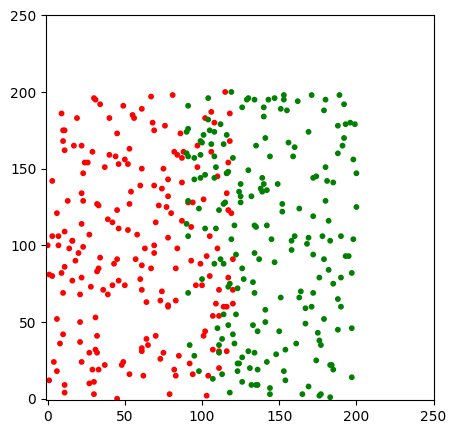

In [ ]:
#########################################################
#   Passons à un modèle avec BEAUCOUP PLUS DE POINTS   #
#######################################################

np.random.seed(0)

#Points = [[1,0,0] for y in range(10)]
GreenPoints = [[random.randint(90,200), random.randint(0,200), 1 ] for x in range(200)]
RedPoints = [[random.randint(0,120),random.randint(0,200), -1 ] for x in range(200)]

G = np.array(GreenPoints)
R = np.array(RedPoints)
Points = np.concatenate((R, G))

plot_points_with_decision_boundary(Points, 250, 250)

Voici nos points séparés avec la meilleure optimisation de la HINGE LOSS.
L'hyperplan a correctement classé 352 / 400 points


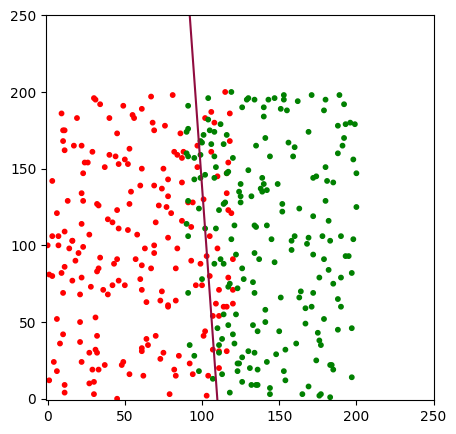

In [ ]:
bestSeparationHyperplanResponse = best_separation_params[2](Points, best_separation_params[1])

OptimalW = bestSeparationHyperplanResponse[1]
OptimalB = bestSeparationHyperplanResponse[2]

print(f"Voici nos points séparés avec la meilleure optimisation de la {best_separation_params[0]}.")
get_good_prediction_count(Points, OptimalW, OptimalB)

plot_points_with_decision_boundary(Points, 250, 250, OptimalW, OptimalB)